# Loding required Libraries...

In [53]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten,Dropout
from keras.activations import relu,softmax
from keras.initializers import VarianceScaling
from keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy
import matplotlib.pyplot as plt

# Loding Data of Mnist...

In [55]:
mnist = datasets.fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [56]:
mnist.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,...,pixel735,pixel736,pixel737,pixel738,pixel739,pixel740,pixel741,pixel742,pixel743,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,147.0,252.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [57]:
mnist.target

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [58]:
print(mnist.data.shape)
print(mnist.target.shape)

(70000, 784)
(70000,)


In [59]:
X = mnist.data
y = mnist.target

In [60]:
y = y.astype(int)

In [61]:
X = X/255

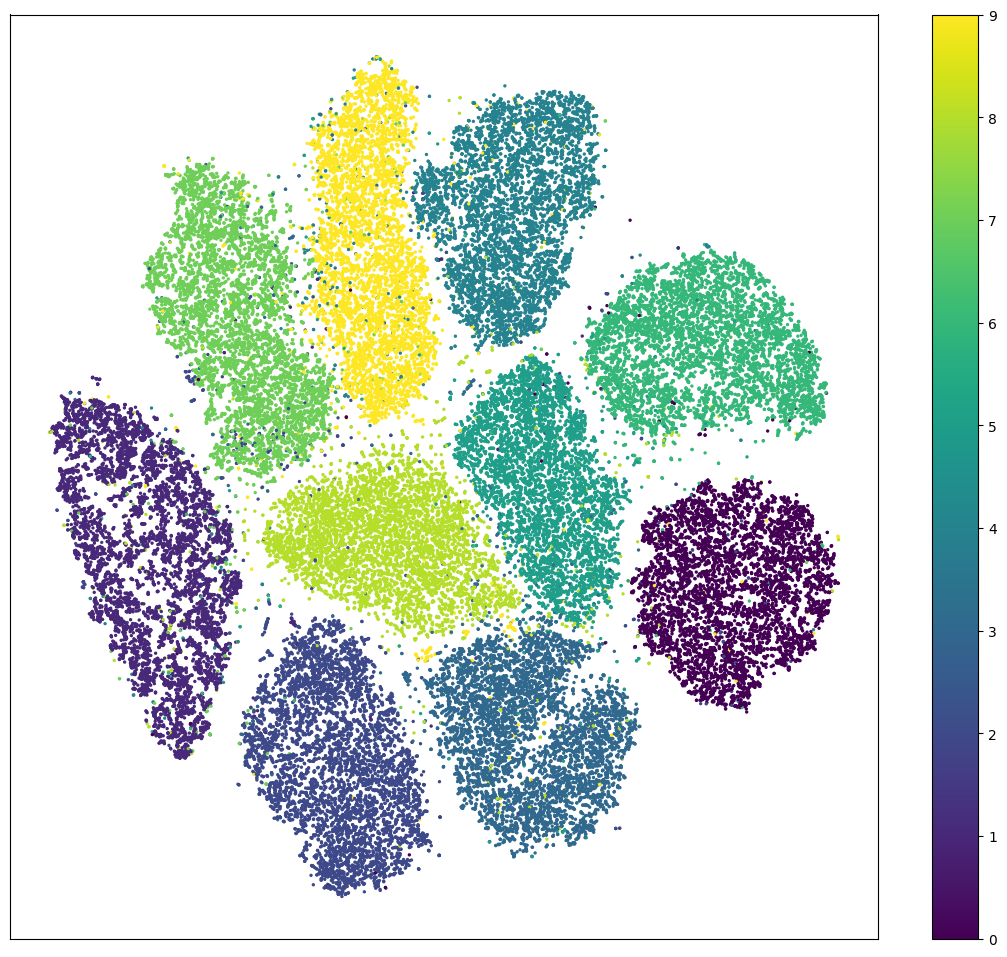

In [30]:
from sklearn.manifold import TSNE
tsne = TSNE()
tsne_res = tsne.fit_transform(X)
plt.figure(figsize=(14, 12))
plt.scatter(tsne_res[:,0], tsne_res[:,1], c=y, s=2)
plt.xticks([])
plt.yticks([])
plt.colorbar()

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)

In [63]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(56000, 784)
(14000, 784)
(56000,)
(14000,)


6


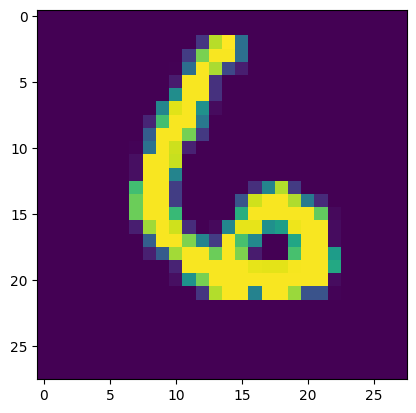

In [64]:
import matplotlib.pyplot as plt
print(y_train.iloc[2])
plt.imshow(np.array(X_train.iloc[2]).reshape(28,28))
plt.show()

In [65]:
# X_train_scaled = X_train/255
# X_test_scaled = X_test/255

In [66]:
# X_train_scaled = X_train_scaled.values
# y_train = y_train.values

In [67]:
model = Sequential()
model.add(Dense(512,activation='relu',input_dim=784))
model.add(Dense(512,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 512)               401920    
                                                                 
 dense_27 (Dense)            (None, 512)               262656    
                                                                 
 dense_28 (Dense)            (None, 128)               65664     
                                                                 
 dense_29 (Dense)            (None, 128)               16512     
                                                                 
 dense_30 (Dense)            (None, 64)                8256      
                                                                 
 dense_31 (Dense)            (None, 64)                4160      
                                                                 
 dense_32 (Dense)            (None, 32)               

In [68]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [69]:
history = model.fit(X_train, y_train, epochs=25, validation_split=0.2)

Epoch 1/25
1400/1400 [==============================] - 19s 9ms/step - loss: 0.3973 - accuracy: 0.8758 - val_loss: 0.1725 - val_accuracy: 0.9569
Epoch 2/25
1400/1400 [==============================] - 14s 10ms/step - loss: 0.1428 - accuracy: 0.9618 - val_loss: 0.1187 - val_accuracy: 0.9712
Epoch 3/25
1400/1400 [==============================] - 8s 5ms/step - loss: 0.1062 - accuracy: 0.9719 - val_loss: 0.1430 - val_accuracy: 0.9662
Epoch 4/25
1400/1400 [==============================] - 11s 8ms/step - loss: 0.0867 - accuracy: 0.9781 - val_loss: 0.1168 - val_accuracy: 0.9712
Epoch 5/25
1400/1400 [==============================] - 13s 9ms/step - loss: 0.0719 - accuracy: 0.9817 - val_loss: 0.1305 - val_accuracy: 0.9715
Epoch 6/25
1400/1400 [==============================] - 9s 6ms/step - loss: 0.0648 - accuracy: 0.9833 - val_loss: 0.1205 - val_accuracy: 0.9712
Epoch 7/25
1400/1400 [==============================] - 7s 5ms/step - loss: 0.0497 - accuracy: 0.9868 - val_loss: 0.1242 - val_accu

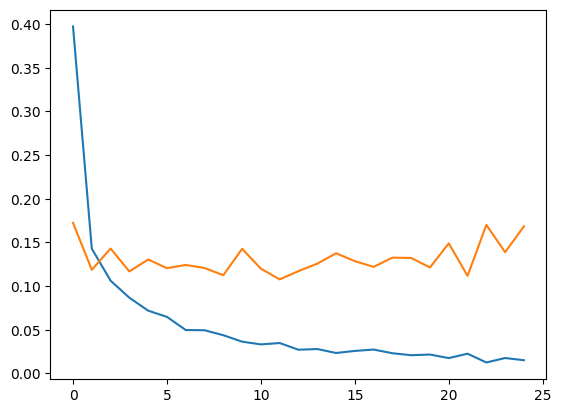

In [70]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

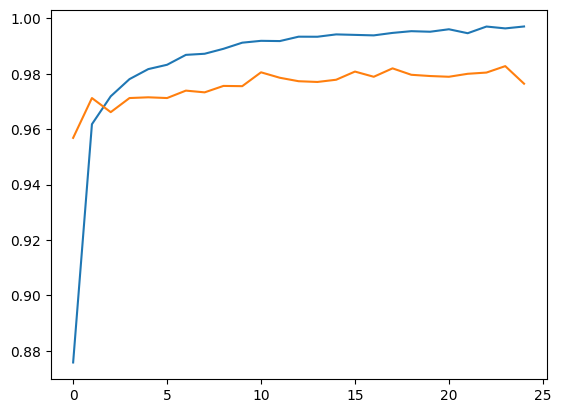

In [71]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [72]:
y_pred = model.predict(X_test).argmax(axis=1)
y_pred

438/438 [==============================] - 1s 2ms/step


array([3, 1, 6, ..., 8, 9, 4])

In [73]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9754285714285714

# 2nd Method

In [94]:
print(X.shape)

(70000, 784)


In [102]:
X_m2 = X.to_numpy().reshape(70000,28,28)
# X_m2 = X
X_m2.shape

(70000, 28, 28)

In [103]:
X_train_m2,X_test_m2,y_train_m2,y_test_m2 = train_test_split(X_m2,y,train_size=0.8,random_state=1010)

In [104]:
model2 = Sequential()
model2.add(Convolution2D(
    input_shape=(28, 28, 1),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=relu,
    kernel_initializer=VarianceScaling()
))
model2.add(MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))
model2.add(Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=relu,
    kernel_initializer=VarianceScaling()
))
model2.add(MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))
model2.add(Flatten())
model2.add(Dense(
    units=128,
    activation=relu
));
model2.add(Dropout(0.2))
model2.add(Dense(
    units=10,
    activation=softmax,
    kernel_initializer=VarianceScaling()
))

In [105]:
model2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 24, 24, 8)         208       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 12, 12, 8)         0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 8, 8, 16)          3216      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 4, 4, 16)          0         
 ng2D)                                                           
                                                                 
 flatten_5 (Flatten)         (None, 256)               0         
                                                                 
 dense_43 (Dense)            (None, 128)             

In [106]:
model2.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [107]:
history_m2 = model2.fit(
    X_train_m2,
    y_train_m2,
    epochs=25,
    validation_split = 0.2,
    use_multiprocessing = True
)

Epoch 1/25
1400/1400 [==============================] - 13s 4ms/step - loss: 0.2515 - accuracy: 0.9229 - val_loss: 0.0697 - val_accuracy: 0.9787
Epoch 2/25
1400/1400 [==============================] - 6s 4ms/step - loss: 0.0758 - accuracy: 0.9760 - val_loss: 0.0474 - val_accuracy: 0.9836
Epoch 3/25
1400/1400 [==============================] - 6s 4ms/step - loss: 0.0566 - accuracy: 0.9824 - val_loss: 0.0426 - val_accuracy: 0.9864
Epoch 4/25
1400/1400 [==============================] - 5s 4ms/step - loss: 0.0435 - accuracy: 0.9866 - val_loss: 0.0389 - val_accuracy: 0.9892
Epoch 5/25
1400/1400 [==============================] - 8s 5ms/step - loss: 0.0380 - accuracy: 0.9877 - val_loss: 0.0362 - val_accuracy: 0.9896
Epoch 6/25
1400/1400 [==============================] - 5s 4ms/step - loss: 0.0313 - accuracy: 0.9901 - val_loss: 0.0396 - val_accuracy: 0.9892
Epoch 7/25
1400/1400 [==============================] - 6s 4ms/step - loss: 0.0276 - accuracy: 0.9911 - val_loss: 0.0394 - val_accuracy

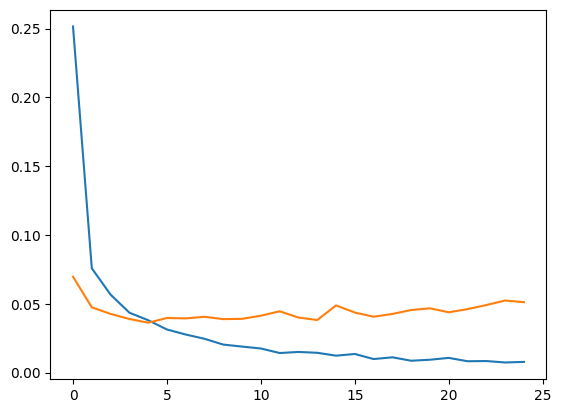

In [108]:
plt.plot(history_m2.history['loss'])
plt.plot(history_m2.history['val_loss'])

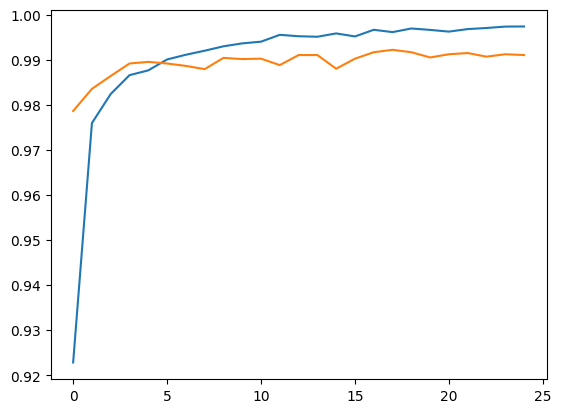

In [109]:
plt.plot(history_m2.history['accuracy'])
plt.plot(history_m2.history['val_accuracy'])

In [110]:
y_pred_m2 = model2.predict(X_test_m2).argmax(axis=1)
y_pred_m2

438/438 [==============================] - 1s 3ms/step


array([8, 0, 1, ..., 6, 4, 0])

In [111]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_m2,y_pred_m2)

0.9905714285714285